In [4]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

# Лабораторная работа 3.2.3 Резонанс токов.

## 1) Зависимость токов от положения сердечника

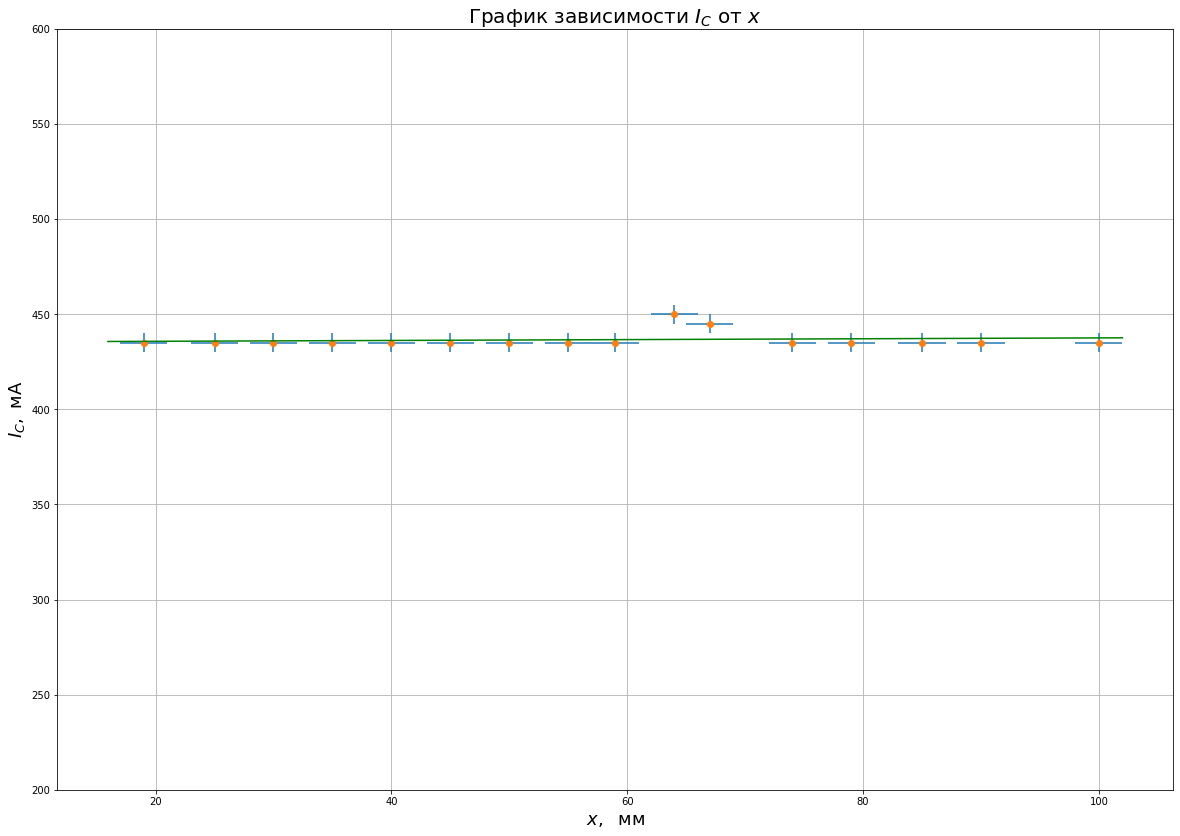

In [103]:
x = np.array([19, 25, 30, 35, 40, 45, 50, 55, 59, 64, 67, 74, 79, 85, 90, 100])
I = np.array([235, 217, 198, 178, 160, 135, 115, 85, 70, 50, 40, 65, 97, 145, 175, 228])
I_l = np.array([200, 210, 235, 250, 275, 300, 320, 360, 380, 420, 445, 480, 520, 570, 610, 660])
I_c = np.array([435, 435, 435, 435, 435, 435, 435, 435, 435, 450, 445, 435, 435, 435, 435, 435])

plt.figure(figsize=(20,14))
plt.xlabel(u'$x,$  мм', fontsize=18)
plt.ylabel(u'$I_C,$ мА', fontsize=18)
#plt.xlim([0, 25])
plt.ylim([200, 600])
plt.title(u'График зависимости $I_C$ от $x$', fontsize=20)
plt.errorbar(x, I_c, xerr = 2, yerr = 5, fmt='none', barsabove=True)
#plt.plot(x, I, 'o', label='_nolegend_',markersize=6)
#plt.plot(x, I_l, 'o', label='_nolegend_',markersize=6)
plt.plot(x, I_c, 'o', label='_nolegend_',markersize=6)

def f0(x, b0, a0):
    return x*b0+a0
def f1(x, b0, a0, c0,d0, e0):
    return c0*(x-e0)/((x-e0)/np.sqrt(((b0-x)**2+a0))+d0)
def f2(x, b0, a0,d0,c0):
    return (a0*np.log(x)+b0)*x+c0*(x**2)+d0


gopt, gcov = curve_fit(f0, xdata = x, ydata = I_c)#, sigma = sigma_I11)
#I_grad = np.append(I_grad, 0)
x_int = np.linspace(x[0]*(1-0.16), x[x.size -1]*(1+0.02), 600)
plt.plot(x_int, f0(x_int, *gopt), 'g')

plt.grid()
#plt.savefig("3.2.3.3.png")